<a href="https://colab.research.google.com/github/SadeemAlasiri/Ex_week3/blob/main/Copy_of_Bagging_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging Exercise

In this exercise, you will explore the concept of Bagging (Bootstrap Aggregating) and implement it using a random forest model. Bagging is an ensemble technique mainly used for reducing the variance of a predictive model and preventing overfitting. The main idea behind bagging is to combine multiple learners in a way that the ensemble model performs better than an individual model.

## Dataset
We will use the Iris dataset for this exercise. The Iris dataset is a classic dataset from the field of machine learning, containing measurements for iris flowers of three different species. **Feel free to use another dataset!!**

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement Bagging models.
4. Evaluate the models performance.

Please fill in the following code blocks to complete the exercise.


In [1]:
! pip install pymongo scikit-learn python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.4 MB/s eta 0:00:00


In [32]:
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np


# Load the dataset


In [3]:
iris = datasets.load_iris() # استدعينا من المكتبه داتا ست الايرز
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # استدعينا الفيرم داتا
df['target'] = iris.target # استدعاء العامود المودود

# Preprocess the data (if necessary)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
# data = df.dropna()

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


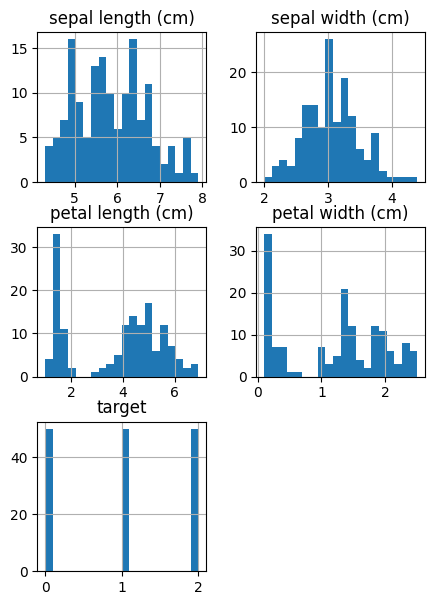

In [ ]:
df.hist(bins=20,figsize=(5,7));

In [ ]:
df['target'].value_counts() # y

target
0    50
1    50
2    50
Name: count, dtype: int64

# Split the Dataset

In [5]:
X=df.drop(columns=['target']).values
y=df['target'].values
# هنا حطينا الفاليو عشان تكون داخل اري


In [6]:
scaler = StandardScaler()# هنا سويت الاسكالر للاكس
X = scaler.fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

array([[-1.50652052e+00,  1.24920112e+00, -1.56757623e+00,
        -1.31544430e+00],
       [-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
        -1.05217993e+00],
       [ 1.03800476e+00,  9.82172869e-02,  3.64896281e-01,
         2.64141916e-01],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
        -1.31544430e+00],
       [-1.74885626e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [ 5.53333275e-01, -1.28296331e+00,  7.05920842e-01,
         9.22302838e-01],
       [ 6.74501145e-01,  3.28414053e-01,  4.21733708e-01,
         3.95774101e-01],
       [-7.79513300e-01,  1.01900435e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
        -1.44707648e+00],
       [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
         9.22302838e-01],
       [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
      

In [ ]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

# Initialize and Train the Classifiers

## Random Forest
Initialize and train a Random Forest classifier.

In [8]:
# Initialize and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
random_forest_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
# accuracyy = accuracy_score(y_train, prediction)
# print(f'Random Forest Model Accuracy: {accuracyy * 100:.2f}%')

Random Forest Model Accuracy: 100.00%


### Evaluate the model performance

In [9]:
predictions = random_forest_classifier.predict(X_test)
# prediction = random_forest_classifier.predict(X_train)

In [10]:
accuracy = accuracy_score(y_test, predictions)

print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

Random Forest Model Accuracy: 100.00%


## Bagging Meta-estimator
Initialize a K-Nearest Neighbors classifier and use it as the base estimator for the Bagging classifier.

In [19]:
base_estimator = KNeighborsClassifier()
bagging_classifier = BaggingClassifier(base_estimator,n_estimators=50, random_state=42)

# Train the classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = bagging_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Bagging Classifier Model Accuracy: {accuracy * 100:.2f}%')

Bagging Classifier Model Accuracy: 100.00%


In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagg = BaggingClassifier(n_estimators=20,random_state=42)

### Evaluate the model performance

In [ ]:
Bagg.fit(X_train,y_train)

BaggingClassifier(n_estimators=20, random_state=42)

In [ ]:
prd=Bagg.predict(X_test)

In [ ]:
scor=accuracy_score(prd,y_test)
scor

1.0

## Pasting
Initialize a Decision Tree classifier and use it as the base estimator for a Bagging classifier with Pasting (without replacement).

In [24]:
base_estimator = DecisionTreeClassifier()
pasting_classifier = BaggingClassifier(base_estimator, n_estimators=50, max_samples=0.7, bootstrap=False, random_state=42)


### Evaluate the model performance

In [25]:
pasting_classifier.fit(X_train, y_train)

predictions = pasting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

## Roughly Balanced Bagging (RBB)
Implement Roughly Balanced Bagging by manually creating balanced bootstrap samples and aggregating predictions from multiple Decision Tree classifiers.

In [47]:
n_estimators = 100

# Initialize arrays to store the ensemble predictions and models
ensemble_preds = np.zeros((n_estimators, len(X_test)))
ensemble_models = []

for i in range(n_estimators):
    # Create a bootstrap sample, ensuring it's roughly balanced
    pos_indices = np.where(y_train == 1)[0]
    neg_indices = np.where(y_train == 0)[0]

    n_samples = min(len(pos_indices), len(neg_indices))
    chosen_pos_indices = np.random.choice(pos_indices, size=len(pos_indices), replace=True)
    chosen_neg_indices = np.random.choice(neg_indices, size=len(pos_indices), replace=True)

    balanced_sample_indices = np.concatenate([chosen_pos_indices, chosen_neg_indices])
    np.random.shuffle(balanced_sample_indices)

    X_train_balanced = X_train[balanced_sample_indices]
    y_train_balanced = y_train[balanced_sample_indices]


### Evaluate the model performance

In [52]:
  tree_clf = DecisionTreeClassifier(random_state=i)
  tree_clf.fit(X_train_balanced, y_train_balanced)
  ensemble_models.append(tree_clf)

    # Make predictions on the test set
  ensemble_preds[i] = tree_clf.predict(X_test)

# Majority voting across all estimators for the final prediction
final_preds = np.round(np.mean(ensemble_preds, axis=0))

# Calculate accuracy
accuracy = accuracy_score(y_test, final_preds)
print(f'Roughly Balanced Bagging Model Accuracy: {accuracy:.2f}')


Roughly Balanced Bagging Model Accuracy: 0.33
